# To-do list

## Metalicty

# To look into list
Hierarchical model <br>
Varitational inference <br>
Different samplers - HMC <br>
Posterior predictive checks 
Use Gyrs 



# rotaation bv and age observers GC
# period age mass and metalictty fundemental GC


In [ ]:
!pip install arviz==0.11.0
!pip install pymc3==3.11.1
!pip install PyAstronomy


     |████████████████████████████████| 1.6MB 4.5MB/s 
     |████████████████████████████████| 4.7MB 5.4MB/s 
     |████████████████████████████████| 768kB 42.3MB/s 
     |████████████████████████████████| 317kB 40.5MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
     |████████████████████████████████| 870kB 5.8MB/s 
     |████████████████████████████████| 1.8MB 39.2MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-cp37-none-any.whl size=1529948 sha256=5bbfab2495fdd08e6f8e26b3b3e6245e2eabb24cc68f5ebf22fa826dddc284a5
  Stored in directory: /root/.cache/pip/wheels/bd/5a/32/a5690ce4309abc60e1776ad3d3b408ead6da77ccced26ee723
Successfully built theano-pymc
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 716kB 4.3MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy
import pandas as pd

import pymc3 as pm
import theano as tt
import arviz 
pd.options.display.max_rows = 4000
 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib  import cm
from PyAstronomy import pyasl

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

print(f"Running on PyMC3 v{pm.__version__}")

Mounted at /content/drive
Running on PyMC3 v3.11.1


In [ ]:
def mean_fn(t, B, A, c, h, f):
  return A * (t)**c  * (B-h)**f


def log_mean_fn(log_Age, BV, A,c,h,f):
  return np.log(A) +c*log_Age + f*np.log(BV-h)








def log_err(vals, val, err_lo):
  return np.mean(np.log(vals)) - np.log(np.mean(vals)- err_lo) ## this works 



#def log_err(vals, val, err_lo):
 # return np.log(val) - np.log(val- err_lo)


#def lin_err(vals, val, err_lo):
#  return val * log_err(vals, val, err_lo)

def lin_err(val, sig_hi, sig_lo):
  return (sig_hi +sig_lo)/2
  

In [ ]:
##### OPTIONS #####
#data1 16th points = 91 total






data = pd.read_csv('/content/drive/My Drive/data/real_data.csv', header=0)
flag = np.array(data['flag'])

Teff = np.array(data['Teff'])

Teff_err = np.array(data['eTeff'])

Age = np.array(data['age']) # convert to Megayrs
Age_err_lo = np.array(data['loage'])
Age_err_hi = np.array(data['upage'])

Prot = np.array(data['P'])
Prot_err_lo = np.array(data['l_P'])
Prot_err_hi = np.array(data['u_P'])

b = pyasl.BallesterosBV_T()
data_points = Prot.shape[0]


#Prot_err = np.array([lin_err(Prot, Prot[i], Prot_err_lo[i]) for i in range(data_points)])
#Age_err = np.array([lin_err(Age, Age[i], Age_err_lo[i]) for i in range(data_points)])

Age_err = np.array([lin_err(Age[i], Age_err_lo[i], Age_err_hi[i]) for i in range(data_points)])
Prot_err = np.array([lin_err(Prot[i], Prot_err_lo[i], Prot_err_hi[i]) for i in range(data_points)])
print(Prot_err)

#sel = np.where((Age>.40) & (Prot>3)&(Prot_err < 13)&(np.abs(Age_err) > 2E-3)) #??
#sel = np.where((Prot > 3) &(Prot < 33) &(np.isnan(Prot_err)==False) & (Prot_err < 35))
sel = np.where((Age > 0.5)&(Prot_err < 40))

Teff = Teff[sel]
Teff_err = Teff_err[sel]
Age = Age[sel]
Age_err_lo = Age_err_lo[sel]
Age_err_hi = Age_err_hi[sel]
Age_err = Age_err [sel]

Prot = Prot[sel]
Prot_err_lo = Prot_err_lo[sel]
Prot_err_hi = Prot_err_hi[sel]
Prot_err = Prot_err [sel]

BV =  b.t2bv(np.array(Teff))

BV_err = Teff_err/Teff * BV

data_points = Prot.shape[0]

print('Using: ',data_points)
print('From: ',data.shape)


[6.89251445e-01 1.63071466e-01 5.67360720e+00 1.10291841e+01
 2.39859120e+00 4.29152901e+00 6.77275927e-01 1.03993987e+01
 2.14367426e+00 3.23677147e+00 3.00715732e+01 5.56972887e-01
 1.06898771e+01 4.46553991e+00 1.75336970e+01 1.57393961e+00
 6.08195832e-01 5.24408654e-01 2.69399219e+01 7.36574327e-01
 1.01742008e+00 1.64897219e+01 5.15769270e-01 1.35304185e+01
 9.89666365e-02 1.94157594e+00 2.78995005e-02 2.17029508e-01
 4.26738676e+00 1.16431968e+00 1.84963416e+01 4.99736177e-01
 2.62099845e+01 6.57988516e-01 5.92129687e-01 1.65197196e+01
 1.99655309e+00 4.09903918e+00 3.74812258e-01 7.84549381e+00
 2.04398235e+00 1.40514525e+00 5.61963896e+00 1.01004423e+00
 1.64148053e+00 5.12745578e-01 1.72559260e+01 2.44563915e-01
 5.83977478e-01 1.85060334e+01 7.17901511e+00 2.85012919e+01
 7.23983053e-01 2.44256511e+00 1.53377701e-01 4.35846065e+01
 4.17186095e+00 6.37284641e+00 9.35466043e-01 3.18061061e-01
 7.81676176e-01 5.57171239e+00 8.99442345e+00 9.95453357e-01
 2.00864621e+00 4.555995

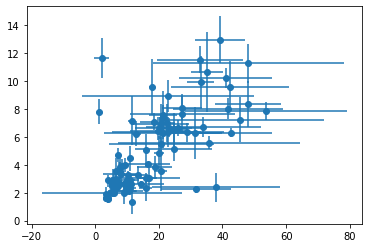

[2.78995005e-02 9.89666365e-02 1.04497092e-01 1.53377701e-01
 1.63071466e-01 2.17029508e-01 2.44563915e-01 2.67528530e-01
 3.18061061e-01 3.57317775e-01 3.74812258e-01 4.55599584e-01
 4.82526649e-01 4.99736177e-01 5.10474506e-01 5.12745578e-01
 5.15769270e-01 5.24408654e-01 5.31971404e-01 5.56972887e-01
 5.83977478e-01 5.92129687e-01 6.08195832e-01 6.57988516e-01
 6.77275927e-01 6.89251445e-01 7.23983053e-01 7.36574327e-01
 7.81676176e-01 9.35466043e-01 9.95453357e-01 1.01004423e+00
 1.01742008e+00 1.14356405e+00 1.16431968e+00 1.31998598e+00
 1.36004331e+00 1.40514525e+00 1.54496817e+00 1.57393961e+00
 1.64148053e+00 1.64161215e+00 1.94157594e+00 1.99655309e+00
 2.00864621e+00 2.04398235e+00 2.14367426e+00 2.39859120e+00
 2.44256511e+00 2.51677090e+00 2.61550219e+00 3.23677147e+00
 3.41642965e+00 3.68487884e+00 4.09903918e+00 4.17186095e+00
 4.26738676e+00 4.29152901e+00 4.46553991e+00 4.51899728e+00
 4.99462094e+00 5.57171239e+00 5.61963896e+00 5.67360720e+00
 6.37284641e+00 6.828346

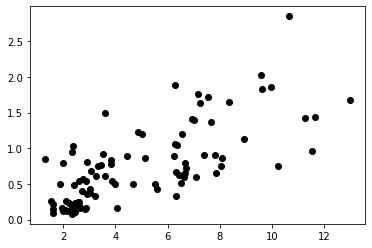

In [ ]:




plt.errorbar(Prot, Age,yerr=Age_err,xerr=Prot_err,fmt='o')
plt.show()
plt.plot(Age, np.abs(Age_err), 'ok')

print(np.sort(Prot_err))

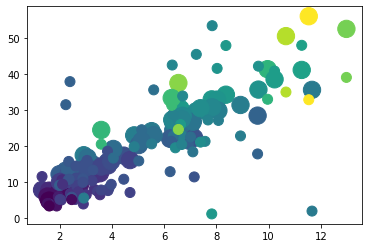

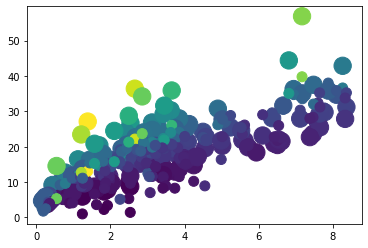

In [ ]:
X = np.array([Age, BV]).T 
h = 0.4 
f = 0.601 
c = 0.52
A = 0.7725 * np.sqrt(1000)


b = pyasl.BallesterosBV_T()



Prot_guess  = mean_fn(X[:,0], X[:,1], A, c,h,f)
plt.scatter(X[:,0], Prot_guess,s=300, c=X[:,1], cmap = cm.viridis, label='model')
#plt.show()
plt.scatter(Age, Prot, c=BV,s=100,cmap = cm.viridis, label='data')

plt.show()


data2 = np.genfromtxt('/content/drive/My Drive/data/data1.csv', delimiter=',', skip_header=1)
smp_rt=10
Teff2 = data2[:,0][0::smp_rt] # Teff
Prot2 = data2[:, 1][0::smp_rt]  # Prot
Age2 = data2[:, 2][0::smp_rt]  # Age 
BV2 = b.t2bv(np.array(Teff2))

Prot_guess2 = mean_fn(Age2, BV2, A,c,h,f)

plt.scatter(Age2, Prot_guess2,s=300, c=BV2, cmap = cm.viridis, label='model')
plt.scatter(Age2, Prot2, c=BV2,s=100,cmap = cm.viridis, label='data')
plt.show()


https://iopscience.iop.org/article/10.1088/0004-637X/695/1/679/pdf
In this article a form is given to determine P from Bv and age that is of a slightly sifferent form to what I am currently using.
$P(t, B-V) = t^{0.52} g(B-V -h)^f$ <br>
where $g=0.77, h=0.4, f = 0.6$. I will now construct another GP using this as the mean function and see how it goes.

Im gonna sort of bash the BV dependance onto the end of my current mass, age mean function and see how it goes B). The new mean function will look like $P(t,m,(B-V)) = At^cm^d((B-V)-h)^f$. Where I a taking d from the previous GP, here A is going to be allowed to vary and the starting value will be $A^{\star}g$, where $A^{\star}$ is the A from before.  

This has resulted in considerably better results.


In [ ]:
#### book ####


h = 0.4 
f = 0.601 
c = 0.5189 
A = 0.7725 * np.sqrt(1000)



X = np.array([Age, BV]).T 
print(X.shape)


with pm.Model() as model:
    c_ = pm.Normal('c_', c, 0.054)
    f_ = pm.Normal('f_', f, 0.25)
    A_ = pm.Normal('A_', A, A*0.15)

    
    Age_true = pm.Uniform('Age_true', 0, 14, shape=data_points)
    Age_obs = pm.Normal("Age_obs", Age_true, np.abs(Age_err), observed=X[:,0])


    

    BV_true = pm.Lognormal("BV_true", 1, 1, shape=data_points)
    BV_obs = pm.Normal("BV_obs", BV_true, np.abs(BV_err), observed=X[:,1])


  #  mean = A_* Age_true**c_ * (BV_true - h)**f_
    mean = mean_fn(Age_true, BV_true, A,c,h,f)
    resid = Prot - mean
   
    l1 = pm.Normal('l1', mu=20, sigma=5)  # 20
    #l2 = pm.Normal('l2', mu=0.05, sigma=0.05)
    l2 = pm.Lognormal("l2", np.log(0.05), 0.1)

   # sf1 = pm.Lognormal("sf1", np.log(12), 0.1)
    sf1 = pm.Normal('sf1', 5, 2)
   # sf2 = pm.Lognormal("sf2", np.log(2), 1)
    sf2 = pm.Normal('sf2', 2, 2)

    K1 = pm.gp.cov.ExpQuad(2, l1) * sf1**2
    K2 = pm.gp.cov.ExpQuad(2, l2) * sf2**2

    K = K1 * K2 # try multiply 


    gp = pm.gp.Marginal(cov_func=K)
    #x = tt.tensor.stack([Age_true, BV_true])

    obs = gp.marginal_likelihood("obs", X=X , y=resid, noise=np.abs(Prot_err))

    # big gp book says constnat plus a product of linear + white noise will do the trick




(93, 2)


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sf2, sf1, l2, l1, BV_true, Age_true, A_, f_, c_]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 3786 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


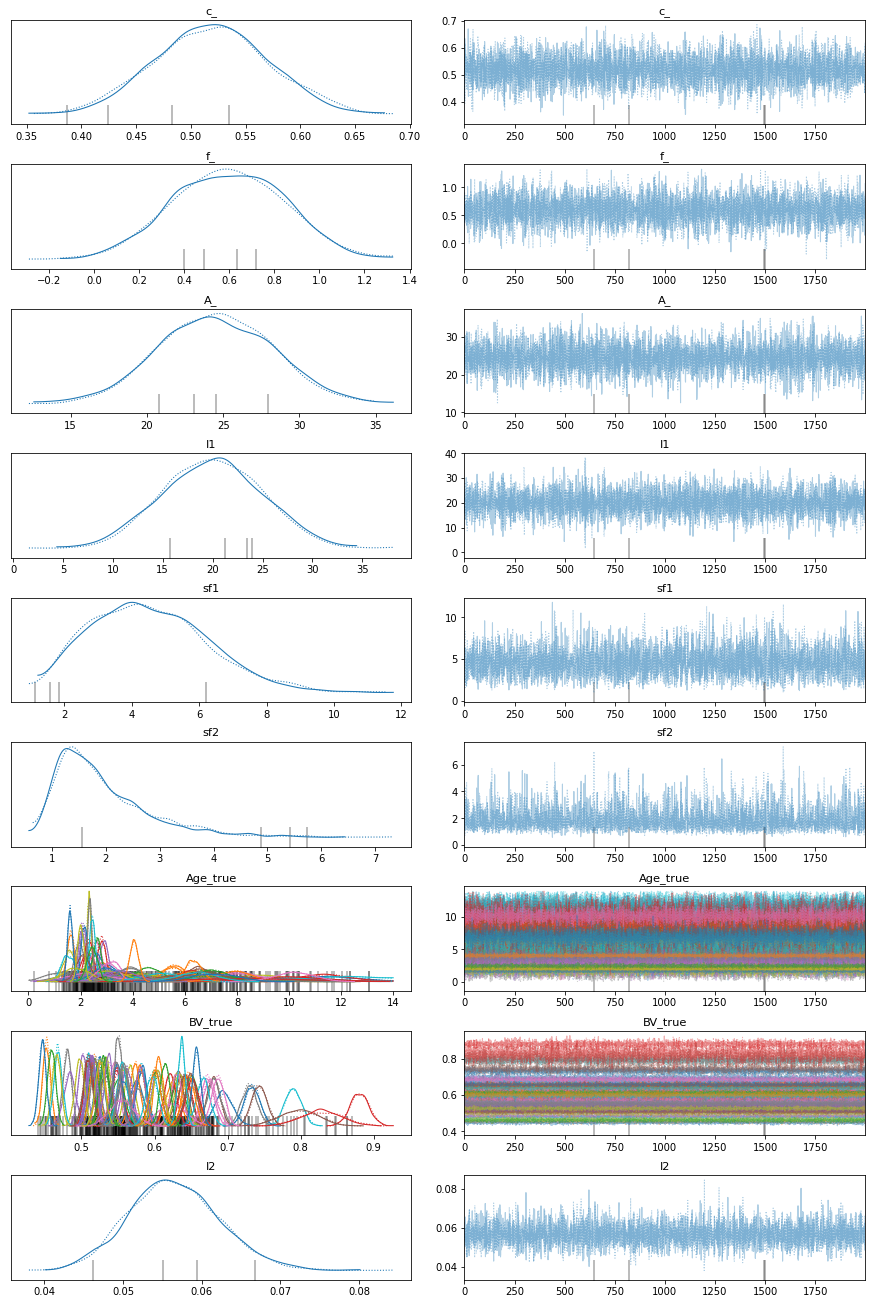

In [ ]:

with model:
  trace = pm.sample(2000, tune=2000, cores=2, target_accept=0.9)
  arviz.plot_trace(trace)

In [ ]:
with model:
  print(arviz.summary(trace))


lst = trace.varnames
# list of all variables to sample posterior over
lst.append('f_pred')
vars = np.asarray(lst)

with model:
  f_pred = gp.conditional('f_pred', X, pred_noise=False) # predict function
  pred_samples = pm.sample_posterior_predictive(trace, var_names=vars,samples=2500)


                mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
c_             0.519  0.053   0.424  ...    9886.0    2527.0    1.0
f_             0.599  0.248   0.138  ...    8150.0    2768.0    1.0
A_            24.507  3.718  17.607  ...    9056.0    2790.0    1.0
l1            20.006  4.982  10.916  ...    9668.0    2569.0    1.0
sf1            4.555  1.731   1.541  ...    4754.0    2765.0    1.0
sf2            1.939  0.884   0.775  ...    4589.0    2564.0    1.0
Age_true[0]    2.993  0.413   2.204  ...    9292.0    2473.0    1.0
Age_true[1]    1.625  0.142   1.376  ...    7289.0    2582.0    1.0
Age_true[2]    3.299  0.714   1.930  ...    7240.0    2531.0    1.0
Age_true[3]    2.252  0.244   1.814  ...    7775.0    2651.0    1.0
Age_true[4]    2.103  0.125   1.868  ...    8536.0    2739.0    1.0
Age_true[5]    6.627  0.548   5.586  ...    9655.0    2716.0    1.0
Age_true[6]    2.653  0.172   2.346  ...    6828.0    2964.0    1.0
Age_true[7]    8.792  1.529   5.912  ...    8869

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [ ]:

new_err = np.mean([ trace.get_values('Age_true')[:,i].std()/  trace.get_values('Age_true')[:,i].mean() for i in range(data_points)])
old_err =np.mean(np.abs(Age_err/Age))


print('Initianl error: ', old_err*100, '%')
print('New error: ', new_err*100,'%')
print("I have added {}% error :)".format(round(new_err-old_err,5)*100))


Initianl error:  15.63466529903392 %
New error:  14.98409938951077 %
I have added -0.651% error :)


In [ ]:
print(trace.get_values('Age_true').shape)
Age_new = np.mean(trace.get_values('Age_true'), axis=0)
BV_new = np.mean(trace.get_values('BV_true'), axis=0)
print(Age_new.shape)

(4000, 93)
(93,)


TypeError: ignored

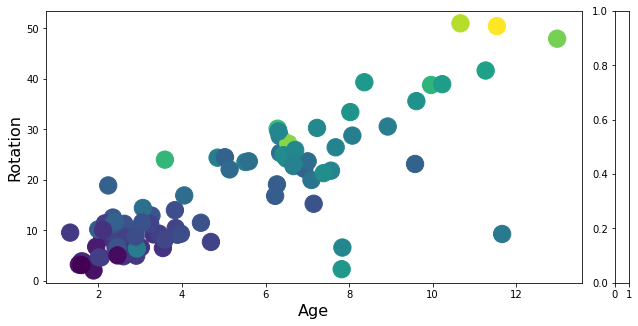

In [ ]:

#X = np.array([Age_new, BV_new]).T 
X = np.array([Age, BV]).T 
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()



fit, var = gp.predict(X, point=trace[-1], diag=True)
sd = np.sqrt(var)

mean = mean_fn(X[:,0], X[:,1], A, c ,h,f)

mu = fit + mean

#k = np.argsort(X[:,0])
#plt.fill_between(X[:,0][k], mu - 2 * sd, mu + 2 * sd, color="r", alpha=0.5)


## plotting the predictions, make a plot of age on x axis b-v on y, plot points and colour by age

plt.scatter(X[:,0], mu, s=300, c=X[:,1], marker = 'o', cmap = cm.viridis)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Rotation', fontsize=16)
plt.colorbar(label='BV', fontsize=16)
plt.scatter(Age, Prot, c=BV, s=100, cmap = cm.viridis)
plt.legend()
plt.show()

In [ ]:
#A = np.mean(trace['A_'])
#c = np.mean(trace['c_'])
#h = h
#f = np.mean(trace['f_'])




fit, var = gp.predict(X, point=trace[-1], diag=True)



mu = mean + fit
std = np.sqrt(var) * np.sign(var)


vals = np.sort(np.array([mu, std, Prot]), axis=1)





age_fit_err = [trace.get_values('Age_true')[:,i].std() for i in range(trace.get_values('Age_true').shape[1])]
bv_fit_err = [trace.get_values('BV_true')[:,i].std() for i in range(trace.get_values('BV_true').shape[1])]


plt.errorbar(Prot, Age, yerr=Age_err, xerr=Prot_err, fmt='o', label='data')
plt.errorbar(vals[0,:], X[:,0], xerr=vals[1,:], yerr=age_fit_err, fmt='o', label='fitted')
plt.legend()
plt.show()


plt.errorbar(Prot, BV, yerr=BV_err, xerr=Prot_err, fmt='o', label='data')



order = np.argsort(X[:,1])


plt.errorbar(vals[0,:][order], X[:,1][order], xerr=vals[1,:][order], yerr=bv_fit_err, fmt='o', label='fitted')
plt.legend()
plt.show()


In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot([0, 50], [0, 50], linestyle='--', label='y=x', color='r')
plt.errorbar(vals[2,:], vals[0,:], yerr=vals[1,:], fmt='o', label=r'data - predictions', color='b', alpha=1)
plt.fill_between(vals[2,:], vals[0,:] - vals[1,:], vals[0,:] + vals[1,:], alpha=0.3, label=r'$\sigma$',interpolate=True, color='blue')
plt.fill_between(vals[2,:], vals[0,:] - 2*vals[1,:], vals[0,:] + 2*vals[1,:], alpha=0.2, label=r'$2\sigma$', interpolate=True, color='b')
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.savefig("R4.png")
files.download("R4.png") 
plt.legend()
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.show()


Z = (vals[2,:] - vals[0, :])/(vals[1,:])
x = np.linspace(-5,5, 1000)
norm = 1/np.sqrt(2 * np.pi) * np.exp(-1/2 * x**2) #N(0,1) to compare with Z 


plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(Z, density=True, label=r'$Z=(Data-Predictions)/\sigma$', color='limegreen', bins=20)
plt.plot(x,norm, label='N(0,1)', color='k', linestyle='--')
plt.legend()
plt.savefig("H4.png")
files.download("H4.png") 
plt.show()
print(Z.mean())


In [ ]:
print(sd)
print(fit)
print(mean)
plt.plot(mean-Prot, label='mean')
plt.plot(mu-Prot, label='mu')
plt.legend()

These two plots are evidence that this model does fit the data very well. We can use the parameters and hyper parameters gathered here for future GP implementations on true data. 

Second fast component t the gp when we dont have B-V